In [1]:
import gensim

In [2]:
gensim.__version__

'4.2.0'

In [3]:
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import spacy
import string

In [4]:
np.random.seed(42)

In [5]:
import gensim.downloader as api

In [6]:
list(api.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [11]:
wv_glove_twitter_50 = api.load('glove-twitter-50')

[===============================-------------------] 62.6% 124.8/199.5MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.1% 161.9/199.5MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 96.1% 191.8/199.5MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 199.5/199.5MB downloaded


In [13]:
wv_glove_twitter_50.save('../data/vectors/wv_glove_twitter_50.kv')

In [15]:
type(wv_glove_twitter_50)

gensim.models.keyedvectors.KeyedVectors

In [16]:
wv_glove_twitter_50['apple']

array([ 5.1418e-01, -1.9196e-01, -7.9963e-01,  9.1339e-01, -5.7061e-01,
        7.1746e-01, -5.8979e-01, -5.1530e-01,  1.3453e+00, -2.0792e-01,
        4.4555e-01,  2.4981e-01, -3.2020e+00,  3.5736e-01, -2.3593e-02,
       -3.1158e-02,  3.7782e-01,  6.4447e-01,  1.2056e+00, -1.0553e-01,
       -8.9697e-01, -7.9754e-01,  2.0239e-01, -1.0664e+00, -4.7167e-01,
       -2.5953e-01,  1.1328e-01, -3.8142e-01,  2.0366e-03, -5.0261e-01,
       -2.5197e-01, -8.4033e-02, -1.0015e+00, -8.6835e-01,  6.6201e-01,
        2.6496e-01,  2.2570e-01, -3.3847e-01, -3.4739e-01,  6.2199e-01,
       -1.3491e+00, -1.7497e-01, -1.1490e+00,  1.5144e-01,  1.1255e+00,
       -6.2668e-01, -3.4274e-01, -3.4938e-01, -1.0806e+00,  6.0174e-01],
      dtype=float32)

In [17]:
wv_google_news_300 = api.load('word2vec-google-news-300')

[=====---------------------------------------------] 11.9% 198.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.0% 233.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.6% 275.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 18.7% 311.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.5% 357.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.8% 412.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.3% 453.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.7% 493.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.3% 537.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.1% 1631.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.3% 1651.8/1662.8MB downloaded


In [18]:
wv_google_news_300.save('../data/vectors/wv_google_news_300.kv')

In [14]:
wv_google_news_300['apple']

array([-0.06445312, -0.16015625, -0.01208496,  0.13476562, -0.22949219,
        0.16210938,  0.3046875 , -0.1796875 , -0.12109375,  0.25390625,
       -0.01428223, -0.06396484, -0.08056641, -0.05688477, -0.19628906,
        0.2890625 , -0.05151367,  0.14257812, -0.10498047, -0.04736328,
       -0.34765625,  0.35742188,  0.265625  ,  0.00188446, -0.01586914,
        0.00195312, -0.35546875,  0.22167969,  0.05761719,  0.15917969,
        0.08691406, -0.0267334 , -0.04785156,  0.23925781, -0.05981445,
        0.0378418 ,  0.17382812, -0.41796875,  0.2890625 ,  0.32617188,
        0.02429199, -0.01647949, -0.06494141, -0.08886719,  0.07666016,
       -0.15136719,  0.05249023, -0.04199219, -0.05419922,  0.00108337,
       -0.20117188,  0.12304688,  0.09228516,  0.10449219, -0.00408936,
       -0.04199219,  0.01409912, -0.02111816, -0.13476562, -0.24316406,
        0.16015625, -0.06689453, -0.08984375, -0.07177734, -0.00595093,
       -0.00482178, -0.00089264, -0.30664062, -0.0625    ,  0.07

In [7]:
from gensim.models import KeyedVectors
wv_google_news_300 = KeyedVectors.load('../data/vectors/wv_google_news_300.kv')

In [8]:
wv_glove_twitter_50 = KeyedVectors.load('../data/vectors/wv_glove_twitter_50.kv')

In [9]:
wv_glove_twitter_50.similarity('apple', 'mango')

0.5289788

In [10]:
wv_glove_twitter_50.similarity('apple', 'car')

0.51229525

In [11]:
wv_google_news_300.similarity('apple', 'mango'), wv_google_news_300.similarity('apple', 'car')

(0.57518554, 0.12830707)

In [12]:
wv_google_news_300.similarity('man', 'mango')

0.032157153

In [31]:
wv_google_news_300.similarity('man', 'woman')

0.76640123

In [33]:
wv_glove_twitter_50.similarity('man', 'king')

0.6646681

In [13]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv_google_news_300.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [35]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv_glove_twitter_50.similarity(w1, w2)))

'car'	'minivan'	0.48
'car'	'bicycle'	0.62
'car'	'airplane'	0.67
'car'	'cereal'	0.38
'car'	'communism'	0.01


In [65]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv_google_news_300.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [45]:
pairs = [
    ('man', 'mechanic'),   # a minivan is a kind of car
    ('man', 'driver'),   # still a wheeled vehicle
    ('man', 'woman'),  # ok, no wheels, but still a vehicle
    ('man', 'car'),    # ... and so on
    ('man', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv_google_news_300.similarity(w1, w2)))

'man'	'mechanic'	0.32
'man'	'driver'	0.38
'woman'	'woman'	1.00
'man'	'car'	0.24
'man'	'communism'	0.07


In [67]:
wv_glove_twitter_50.most_similar(positive=['car', 'minivan'], topn=5)

[('truck', 0.8638960719108582),
 ('driving', 0.8150991797447205),
 ('airplane', 0.8137863278388977),
 ('parked', 0.8027330636978149),
 ('drove', 0.8020969033241272)]

In [68]:
wv_google_news_300.most_similar(positive=['car', 'minivan'], topn=5)

[('SUV', 0.8532192707061768),
 ('vehicle', 0.8175783753395081),
 ('pickup_truck', 0.7763688564300537),
 ('Jeep', 0.7567334175109863),
 ('Ford_Explorer', 0.7565720081329346)]

In [69]:
wv_glove_twitter_50.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car'])

'sea'

In [71]:
wv_google_news_300.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car'])

'land'

In [75]:
wv_google_news_300.doesnt_match(['apple', 'banana', 'orange', 'gtrape', 'melon', 'air'])

'air'

In [73]:
wv_glove_twitter_50.doesnt_match(['apple', 'banana', 'orange', 'gtrape', 'air', 'melon'])

'melon'

In [76]:
wv_glove_twitter_50.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('prince', 0.759779691696167),
 ('stone', 0.7595877051353455),
 ('queen', 0.754626989364624)]

In [77]:
wv_google_news_300.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951)]

In [79]:
wv_google_news_300.most_similar(positive=['woman', 'king'], topn=5)

[('man', 0.6628609299659729),
 ('queen', 0.6438563466072083),
 ('girl', 0.6136074066162109),
 ('princess', 0.6087510585784912),
 ('monarch', 0.5900576710700989)]

In [131]:
words = ["one",'two','man','woman','table', 'apple', 'orange', 'car', 'bus', 'banana', 'chair', 'queen', 'four']

In [132]:
sample_vectors = [wv_google_news_300[word] for word in words]

In [133]:
from sklearn.decomposition import PCA

In [134]:
pca = PCA(n_components=2)
red_vectors = pca.fit_transform(sample_vectors)

In [135]:
red_vectors

array([[-0.18943282,  0.02923954],
       [-0.38229739, -0.00707615],
       [-0.63443777,  1.17084121],
       [-0.85489302,  1.43872488],
       [-0.41057035, -1.22202322],
       [ 2.10221731,  0.03152234],
       [ 1.52756292,  0.03242951],
       [-0.71761532, -0.2864224 ],
       [-0.70805671, -0.98995496],
       [ 1.88504573, -0.15418251],
       [-0.84062391, -1.45751999],
       [-0.34451863,  1.46345655],
       [-0.43238003, -0.04903479]])

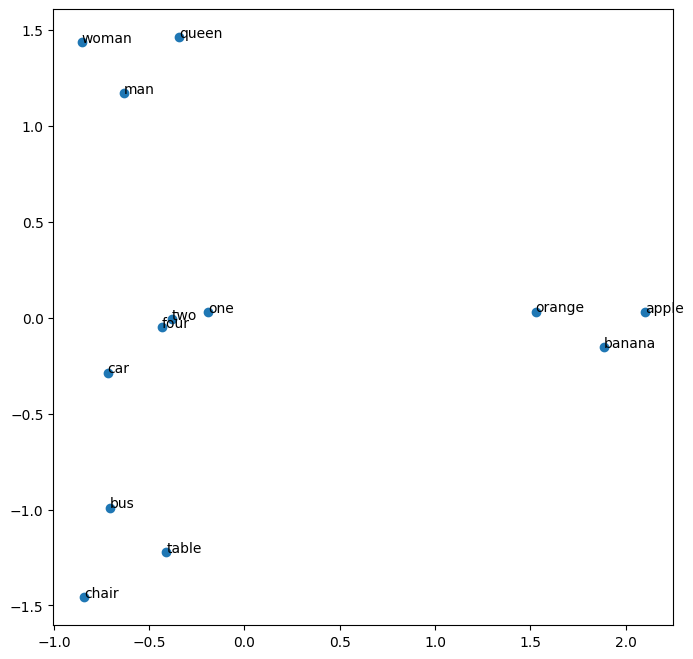

In [136]:
plt.figure(figsize=(8,8))
plt.scatter(red_vectors[:,0], red_vectors[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(red_vectors[i,0], red_vectors[i,1]))

In [16]:
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'sixty', 'me', 'nevertheless', 'using', 'per', 'another', 'their', '‘re', 'and', 'on', 'might', 'mine', 'seemed', 'no', "'ve", 'your', 'of', 'former', 'without', 'may', 'seeming', 'how', 'ca', 'am', 'therefore', "'s", 'though', 'put', 'each', 'whatever', 'upon', 'what', 'afterwards', 'along', 'keep', 'as', 'indeed', 'very', 'by', 'fifteen', 'themselves', 'own', 'show', 'while', 'go', 'why', 'or', 'through', 'thence', 'twenty', 'whereafter', 'hereafter', 'elsewhere', 'nor', 'up', 'toward', 'also', 'are', 'off', 'regarding', 'the', 'latter', 'is', 'only', 'already', 'our', "'d", 'whereas', 'has', 'n’t', 'moreover', 'twelve', 'neither', 'top', '’d', 'anything', 'eight', 'myself', 'be', 'any', 'everyone', 'someone', 'to', 'beforehand', 'anyone', 'full', 'name', 'against', 'move', 'becomes', 'two', 're', 'seem', 'you', 'yourselves', 'meanwhile', 'for', 'either', '’re', 'doing', 'between', 'somehow', 'after', 'would', 'ourselves', 'yet', 'say', 'been', 'anyway', '‘ll', 'us', "'ll", 'further

In [17]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
def spacy_tokenizer(sentence):
    doc = nlp(sentence)
    my_tokens = [word.lemma_.lower() for word in doc]
    
    my_tokens = [token for token in my_tokens if token not in stop_words and token not in punctuations]
    
    return my_tokens

In [24]:
def sent_vec(tokens, wv):
    vec_size = wv.vector_size
    vec = np.zeros(vec_size)
    ctr = 0
    for token in tokens:
        if token in wv:
            vec += wv_google_news_300[token]
            ctr +=1
    vec /= ctr    
    return vec

In [25]:
sent_vec('I am happy', wv_google_news_300)

array([-0.09855143,  0.12802633, -0.00528971,  0.2142334 , -0.06935628,
       -0.04682414, -0.11714681,  0.04329427, -0.02920532,  0.05517578,
       -0.08801142, -0.19173177, -0.13023885,  0.03401693, -0.14339193,
        0.12158203, -0.00496419,  0.32124837, -0.01961263, -0.09421285,
       -0.31205241, -0.08495331,  0.09495036, -0.02915446, -0.06252035,
       -0.09298197, -0.35449219,  0.12286886, -0.04382324, -0.04700724,
        0.07531738, -0.02567546, -0.1325531 , -0.14819336, -0.23128255,
        0.08074951, -0.16984049,  0.21533203, -0.06466675,  0.11775716,
        0.12516276, -0.09240723, -0.01442464,  0.13399251,  0.11010742,
        0.0235726 , -0.10447184, -0.15063477, -0.0423584 ,  0.06081136,
       -0.14233398,  0.27832031, -0.04732259,  0.14597575,  0.0649821 ,
        0.14440918, -0.09765625, -0.06404622, -0.03403727, -0.21468099,
       -0.1702474 , -0.05729167, -0.18485514, -0.04242452,  0.00733439,
       -0.35038249, -0.13305664,  0.09952799,  0.01257324,  0.06

In [26]:
data = pd.read_csv('../data/jigsaw-toxic-comment-classification-challenge/train.csv')

In [27]:
from sklearn.model_selection import train_test_split

In [33]:
data = data.iloc[:2000].copy()

In [34]:
data['tokens'] = data['comment_text'].apply(spacy_tokenizer)

In [35]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explanation, \n, edit, username, hardcore, me..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[d'aww, match, background, colour, seemingly, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, try, edit, war, guy, constantly, re..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[\n, \n, real, suggestion, improvement, wonder..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[sir, hero, chance, remember, page]"


In [38]:
data['vec'] = data['tokens'].apply(lambda token: sent_vec(token,wv_google_news_300 ) )

In [39]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens,vec
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explanation, \n, edit, username, hardcore, me...","[-0.005690765380859375, 0.0490936279296875, 0...."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[d'aww, match, background, colour, seemingly, ...","[-0.03828239440917969, -0.04836273193359375, -..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, try, edit, war, guy, constantly, re...","[0.03294774105674342, 0.0455322265625, -0.0103..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[\n, \n, real, suggestion, improvement, wonder...","[0.008761894412157013, 0.007128459651295732, 0..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[sir, hero, chance, remember, page]","[0.1724609375, 0.06171875, 0.16016845703125, 0..."


In [40]:
from sklearn.linear_model import LogisticRegression

In [60]:
X = pd.DataFrame(data['vec'].to_list())
y = data['toxic']

In [65]:
temp = pd.concat([X,y],axis=1).dropna()

In [66]:
X = temp.iloc[:,:-1]
y = temp.iloc[:,-1]

In [67]:
X

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.005691,0.049094,0.001404,0.089334,-0.067700,-0.001893,-0.002663,-0.123730,0.129883,0.027743,...,0.049402,0.085904,-0.078004,0.007092,-0.011893,-0.069122,0.051978,-0.091455,-0.039178,-0.017926
1,-0.038282,-0.048363,-0.016762,0.102661,-0.006042,-0.035692,0.067307,-0.159180,0.031708,0.017532,...,-0.026367,0.098145,-0.028259,0.031067,0.005219,-0.104248,-0.071442,-0.003654,-0.009644,-0.018147
2,0.032948,0.045532,-0.010384,0.058909,-0.077659,0.067068,0.103117,-0.037325,0.066214,-0.049445,...,0.031507,0.047447,-0.067017,0.013720,-0.084930,-0.086442,0.042069,-0.165579,-0.031374,0.017075
3,0.008762,0.007128,0.039973,0.079590,-0.099370,0.010062,0.055500,-0.077873,0.110748,0.025889,...,-0.039908,0.010489,-0.043777,0.002191,0.023512,-0.075115,-0.004955,-0.133040,-0.048448,-0.011993
4,0.172461,0.061719,0.160168,0.140625,-0.009998,0.002979,0.070239,-0.093164,0.104956,0.073151,...,0.041016,-0.063782,-0.206836,-0.013220,0.001782,-0.128491,-0.091309,-0.148682,-0.026367,-0.037659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.030589,-0.013684,0.094381,0.196791,-0.193759,-0.045397,-0.018161,-0.031148,0.104574,0.153120,...,0.143500,0.102878,-0.033549,0.014560,0.106539,-0.108364,0.003852,-0.067980,0.038628,0.030482
1996,0.048108,0.020143,-0.010266,0.029490,-0.063149,-0.007761,0.027643,-0.042986,0.091641,0.028681,...,-0.012826,0.027820,-0.048538,-0.016179,-0.052150,-0.087704,0.005823,-0.073369,-0.002671,-0.002790
1997,0.046555,-0.002913,-0.008834,0.072227,-0.067897,0.059588,0.142088,-0.034311,0.129441,0.046461,...,-0.018479,0.019729,-0.036946,0.042611,-0.031345,-0.031733,0.024476,-0.085574,-0.000027,0.024030
1998,-0.046168,-0.050310,0.000846,0.005399,-0.077535,0.013575,0.068605,0.011301,0.083583,-0.040436,...,0.001826,0.040070,0.026591,0.017526,-0.070594,0.063235,-0.008446,-0.104127,-0.056775,0.028263


In [68]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: toxic, Length: 1992, dtype: int64

In [69]:
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [70]:
model = LogisticRegression()

In [71]:
X_train = X_train.dropna()

In [72]:
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
y_pred = model.predict(X_text)

In [74]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       359
           1       0.79      0.55      0.65        40

    accuracy                           0.94       399
   macro avg       0.87      0.77      0.81       399
weighted avg       0.93      0.94      0.94       399

